In [1]:
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd 

# Support Sequential
import tensorflow
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")
import os

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

save_dir = "./models/tensorflow/{0}".format(tensorflow.__version__)
# print(save_dir)
os.mkdir(save_dir)

2023-05-10 14:57:34.117950: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-10 14:57:34.147428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 14:57:34.657693: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 14:57:35.192518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at http

Num GPUs Available:  0


FileExistsError: [Errno 17] File exists: './models/tensorflow/2.12.0'

In [2]:
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/
!export XLA_FLAGS=--xla_gpu_cuda_data_dir=
!echo $CONDA_PREFIX}/lib

/home/lsm/miniconda3/envs/research}/lib


# Generate tensorflow model samples for rocket

## Sequential

In [3]:
compas_training = pickle.load(open("./data/pickle_pandas_tabular_compas_training.sav", "rb"))
compas_testing = pickle.load(open("./data/pickle_pandas_tabular_compas_testing.sav", "rb"))

X_train = compas_training.drop("two_year_recid", axis=1)
y_train = compas_training[["two_year_recid"]]
X_test = compas_testing.drop("two_year_recid", axis=1)
y_test = compas_testing[["two_year_recid"]]

### Binary Classification - Sequential - Cross Entropy

In [4]:
input_size = len(X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
y_pred = np.around(model.predict(X_test))
from sklearn.metrics import classification_report
print("score: {0}".format(classification_report(y_test, y_pred)))
print("type: {0}".format(type(model)))

## save
model.save("{0}/binary_classification_compas_crossentropy_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
139/139 [==============================] - 1s 1ms/step - loss: 0.6359 - accuracy: 0.6536 - val_loss: 0.6447 - val_accuracy: 0.6275
Epoch 2/10
139/139 [==============================] - 0s 763us/step - loss: 0.6274 - accuracy: 0.6608 - val_loss: 0.6506 - val_accuracy: 0.6437
Epoch 3/10
139/139 [==============================] - 0s 740us/step - loss: 0.6212 - accuracy: 0.6662 - val_loss: 0.6388 - val_accuracy: 0.6377
Epoch 4/10
139/139 [==============================] - 0s 746us/step - loss: 0.6162 - accuracy: 0.6682 - val_loss: 0.6369 - val_accuracy: 0.6296
Epoch 5/10
139/139 [==============================] - 0s 735us/step - loss: 0.6150 - accuracy: 0.6712 - val_loss: 0.6339 - val_accuracy: 0.6559
Epoch 6/10
139/139 [==============================] - 0s 741us/step - loss: 0.6125 - accuracy: 0.6694 - val_loss: 0.6404 - val_accuracy: 0.6538
Epoch 7/10
139/139 [==============================] - 0s 705us/step - loss: 0.6103 - accuracy: 0.6734 - val_loss: 0.6278 - val_accuracy: 0

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/binary_classification_compas_crossentropy_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/binary_classification_compas_crossentropy_keras.engine.sequential.Sequential.sav/assets


### Binary Classification - Sequential - Focal Cross Entropy

In [11]:
input_size = len(X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=True), optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
y_pred = np.around(model.predict(X_test))
from sklearn.metrics import classification_report
print("score: {0}".format(classification_report(y_test, y_pred)))
print("type: {0}".format(type(model)))

## save
model.save("{0}/binary_classification_compas_focalcrossentropy_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
139/139 [==============================] - 1s 2ms/step - loss: 0.1554 - accuracy: 0.5904 - val_loss: 0.1536 - val_accuracy: 0.5789
Epoch 2/10
139/139 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.5899 - val_loss: 0.1539 - val_accuracy: 0.6053
Epoch 3/10
139/139 [==============================] - 0s 1ms/step - loss: 0.1474 - accuracy: 0.5940 - val_loss: 0.1509 - val_accuracy: 0.5810
Epoch 4/10
139/139 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.6009 - val_loss: 0.1508 - val_accuracy: 0.6154
Epoch 5/10
139/139 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.5969 - val_loss: 0.1514 - val_accuracy: 0.6255
Epoch 6/10
139/139 [==============================] - 0s 2ms/step - loss: 0.1460 - accuracy: 0.6108 - val_loss: 0.1507 - val_accuracy: 0.5810
Epoch 7/10
139/139 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.6124 - val_loss: 0.1494 - val_accuracy: 0.6296
Epoch 

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/binary_classification_compas_focalcrossentropy_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/binary_classification_compas_focalcrossentropy_keras.engine.sequential.Sequential.sav/assets


In [3]:
loan_training = pickle.load(open("./data/pickle_pandas_tabular_loan_training.sav", "rb")).sample(5000)
loan_testing = pickle.load(open("./data/pickle_pandas_tabular_loan_testing.sav", "rb")).sample(2000)

multiclass_X_train = loan_training.drop("Interest_Rate", axis=1)
multiclass_y_train = loan_training[["Interest_Rate"]]
multiclass_X_test = loan_testing.drop("Interest_Rate", axis=1)
multiclass_y_test = loan_testing[["Interest_Rate"]]

### Multiclass Classification - Sequential - Categorical Cross Entropy

In [4]:
model = tensorflow.keras.models.load_model("{0}/multiclass_classification_loan_categoricalcrossentropy_keras.engine.sequential.Sequential.sav".format(save_dir))
model.predict(multiclass_X_test)

63/63 [==============================] - 0s 536us/step


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [10]:
y_binary = to_categorical(multiclass_y_train)

input_size = len(multiclass_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=["accuracy"])
model.fit(multiclass_X_train, y_binary, epochs=10, batch_size=32, validation_split=0.1)
print(model.predict(multiclass_X_test))
## save
model.save("{0}/multiclass_classification_loan_categoricalcrossentropy_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
141/141 [==============================] - 0s 1ms/step - loss: 249.6031 - accuracy: 0.3791 - val_loss: 83.9873 - val_accuracy: 0.2920
Epoch 2/10
141/141 [==============================] - 0s 720us/step - loss: 125.0792 - accuracy: 0.3624 - val_loss: 130.7872 - val_accuracy: 0.2960
Epoch 3/10
141/141 [==============================] - 0s 726us/step - loss: 120.6608 - accuracy: 0.3653 - val_loss: 136.7392 - val_accuracy: 0.4360
Epoch 4/10
141/141 [==============================] - 0s 687us/step - loss: 100.2609 - accuracy: 0.3744 - val_loss: 121.7130 - val_accuracy: 0.4600
Epoch 5/10
141/141 [==============================] - 0s 775us/step - loss: 84.2147 - accuracy: 0.3804 - val_loss: 73.5998 - val_accuracy: 0.4340
Epoch 6/10
141/141 [==============================] - 0s 713us/step - loss: 86.1906 - accuracy: 0.3691 - val_loss: 125.6233 - val_accuracy: 0.4320
Epoch 7/10
141/141 [==============================] - 0s 718us/step - loss: 94.6817 - accuracy: 0.3682 - val_loss: 87.

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/multiclass_classification_loan_categoricalcrossentropy_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/multiclass_classification_loan_categoricalcrossentropy_keras.engine.sequential.Sequential.sav/assets


### Multiclass Classification - Sequential - SparseCategoricalCrossentropy

In [14]:
from keras.utils import to_categorical
#y_binary = to_categorical(multiclass_y_train)

input_size = len(multiclass_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=["accuracy"])
model.fit(multiclass_X_train, multiclass_y_train, epochs=10, batch_size=32, validation_split=0.1)

## save
model.save("{0}/multiclass_classification_loan_sparsecategoricalcrossentropy_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
141/141 [==============================] - 1s 2ms/step - loss: 333.1303 - accuracy: 0.3782 - val_loss: 76.8010 - val_accuracy: 0.3380
Epoch 2/10
141/141 [==============================] - 0s 1ms/step - loss: 140.5272 - accuracy: 0.3760 - val_loss: 255.3937 - val_accuracy: 0.3800
Epoch 3/10
141/141 [==============================] - 0s 1ms/step - loss: 119.3937 - accuracy: 0.3802 - val_loss: 79.3589 - val_accuracy: 0.4740
Epoch 4/10
141/141 [==============================] - 0s 1ms/step - loss: 78.3257 - accuracy: 0.3751 - val_loss: 35.4572 - val_accuracy: 0.3000
Epoch 5/10
141/141 [==============================] - 0s 1ms/step - loss: 91.0272 - accuracy: 0.3744 - val_loss: 107.0147 - val_accuracy: 0.3440
Epoch 6/10
141/141 [==============================] - 0s 1ms/step - loss: 63.5107 - accuracy: 0.3709 - val_loss: 75.3011 - val_accuracy: 0.4220
Epoch 7/10
141/141 [==============================] - 0s 1ms/step - loss: 85.2322 - accuracy: 0.3800 - val_loss: 106.5978 - val_acc

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/multiclass_classification_loan_sparsecategoricalcrossentropy_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/multiclass_classification_loan_sparsecategoricalcrossentropy_keras.engine.sequential.Sequential.sav/assets


### Multiclass Classification - Sequential - CategoricalHinge

In [15]:
from keras.utils import to_categorical
y_binary = to_categorical(multiclass_y_train)

input_size = len(multiclass_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss=tf.keras.losses.CategoricalHinge(), optimizer='adam', metrics=["accuracy"])
model.fit(multiclass_X_train, y_binary, epochs=10, batch_size=32, validation_split=0.1)

## save
model.save("{0}/multiclass_classification_loan_categoricalhinge_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
141/141 [==============================] - 1s 2ms/step - loss: 1.0000 - accuracy: 0.2087 - val_loss: 1.0000 - val_accuracy: 0.1980
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.2087 - val_loss: 1.0000 - val_accuracy: 0.1980
Epoch 3/10
141/141 [==============================] - 0s 1ms/step - loss: 1.0000 - accuracy: 0.2087 - val_loss: 1.0000 - val_accuracy: 0.1980
Epoch 4/10
141/141 [==============================] - 0s 1ms/step - loss: 1.0000 - accuracy: 0.2087 - val_loss: 1.0000 - val_accuracy: 0.1980
Epoch 5/10
141/141 [==============================] - 0s 1ms/step - loss: 1.0000 - accuracy: 0.2087 - val_loss: 1.0000 - val_accuracy: 0.1980
Epoch 6/10
141/141 [==============================] - 0s 1ms/step - loss: 1.0000 - accuracy: 0.2087 - val_loss: 1.0000 - val_accuracy: 0.1980
Epoch 7/10
141/141 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.2087 - val_loss: 1.0000 - val_accuracy: 0.1980
Epoch 

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/multiclass_classification_loan_categoricalhinge_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/multiclass_classification_loan_categoricalhinge_keras.engine.sequential.Sequential.sav/assets


In [17]:
insurance_training = pickle.load(open("./data/pickle_pandas_tabular_insurance_training.sav", "rb"))
insurance_testing = pickle.load(open("./data/pickle_pandas_tabular_insurance_testing.sav", "rb"))
insurance_testing.describe()

regression_X_train = insurance_training.drop("charges", axis=1)
regression_y_train = insurance_training[["charges"]]
regression_X_test = insurance_testing.drop("charges", axis=1)
regression_y_test = insurance_testing[["charges"]]

def train_regression_models(loss, prefix):
    input_size = len(regression_X_train.iloc[0])
    model = Sequential()
    model.add(Dense(200, input_shape=(input_size,), activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=loss, optimizer='adam')
    model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)
    
    model.save("{1}/regression_insurance_{0}_keras.engine.sequential.Sequential.sav".format(prefix, save_dir), "wb+")

### Regression - Sequential - Mean Absolute Error

In [15]:
# input_size = len(regression_X_train.iloc[0])
# model = Sequential()
# model.add(Dense(200, input_shape=(input_size,), activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(25, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer='adam')
# model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)

# ## save
# model.save("./models/regression_insurance_meanabsoluteerror_keras.engine.sequential.Sequential.sav", "wb+")
train_regression_models(tf.keras.losses.MeanAbsoluteError(), "meanabsoluteerror")

Epoch 1/10


2023-03-16 11:58:01.717516: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:326] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-03-16 11:58:01.717718: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:446 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-03-16 11:58:01.728967: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:326] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-03-16 11:58:01.729123: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:446 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-03-16 11:58:01.742480: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:326] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-03-16 11:58:01.742671: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:4

InternalError: Graph execution error:

Detected at node 'StatefulPartitionedCall_6' defined at (most recent call last):
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_17217/3534090025.py", line 12, in <module>
      train_regression_models(tf.keras.losses.MeanAbsoluteError(), "meanabsoluteerror")
    File "/tmp/ipykernel_17217/3920664380.py", line 18, in train_regression_models
      model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/home/seokmin/miniconda3/envs/research/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_6'
libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall_6}}]] [Op:__inference_train_function_2143]

### Regression - Sequential - MeanSquaredError

In [18]:
input_size = len(regression_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam')
model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)

## save
model.save("{0}/regression_insurance_meansquareerror_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
31/31 [==============================] - 1s 5ms/step - loss: 331194368.0000 - val_loss: 243421744.0000
Epoch 2/10
31/31 [==============================] - 0s 3ms/step - loss: 331194368.0000 - val_loss: 243421744.0000
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 331194336.0000 - val_loss: 243421744.0000
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 331194368.0000 - val_loss: 243421744.0000
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 331194368.0000 - val_loss: 243421744.0000
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 331194368.0000 - val_loss: 243421744.0000
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 331194368.0000 - val_loss: 243421744.0000
Epoch 8/10
31/31 [==============================] - 0s 3ms/step - loss: 331194368.0000 - val_loss: 243421744.0000
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 331194336.0000 -

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_meansquareerror_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_meansquareerror_keras.engine.sequential.Sequential.sav/assets


### Regression - Sequential - Hinge

In [19]:
input_size = len(regression_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.Hinge(), optimizer='adam')
model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)

## save
model.save("{0}/regression_insurance_hinge_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
31/31 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
31/31 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/10
31/31 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/10
31/31 [===========================

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_hinge_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_hinge_keras.engine.sequential.Sequential.sav/assets


### Regression - Sequential - Huber

In [20]:
input_size = len(regression_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.Huber(), optimizer='adam')
model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)

## save
model.save("{0}/regression_insurance_huber_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
31/31 [==============================] - 1s 5ms/step - loss: 13460.7061 - val_loss: 11799.9805
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 13460.6748 - val_loss: 11799.9805
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 13460.6748 - val_loss: 11799.9805
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 13460.6758 - val_loss: 11799.9805
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 13460.6758 - val_loss: 11799.9805
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 13460.6777 - val_loss: 11799.9805
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 13460.6748 - val_loss: 11799.9805
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 13460.6748 - val_loss: 11799.9805
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 13460.6748 - val_loss: 11799.9805
Epoch 10/10
31/31 [===========================

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_huber_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_huber_keras.engine.sequential.Sequential.sav/assets


### Regression - Sequential - Poisson

In [21]:
input_size = len(regression_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.Poisson(), optimizer='adam')
model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)

## save
model.save("{0}/regression_insurance_poisson_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
31/31 [==============================] - 1s 5ms/step - loss: 28.8265 - val_loss: 1.0066
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 1.0053 - val_loss: 1.0026
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 1.0020 - val_loss: 1.0005
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 1.0001 - val_loss: 0.9994
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 0.9992 - val_loss: 0.9991
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 0.9989 - val_loss: 0.9989
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.9987 - val_loss: 0.9988
Epoch 8/10
31/31 [==============================] - 0s 3ms/step - loss: 0.9986 - val_loss: 0.9987
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 0.9986 - val_loss: 0.9987
Epoch 10/10
31/31 [==============================] - 0s 2ms/step - loss: 0.9985 - val_loss: 0.9987


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_poisson_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_poisson_keras.engine.sequential.Sequential.sav/assets


### Regression - Sequential - KLDivergence

In [22]:
input_size = len(regression_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.KLDivergence(), optimizer='adam')
model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)

## save
model.save("{0}/regression_insurance_kldivergence_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
31/31 [==============================] - 1s 5ms/step - loss: 0.2997 - val_loss: 5.9577e-04
Epoch 2/10
31/31 [==============================] - 0s 3ms/step - loss: 3.3523e-04 - val_loss: 1.5021e-04
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 1.0116e-04 - val_loss: 4.1161e-05
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 2.4103e-05 - val_loss: 8.8524e-06
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 6.3317e-06 - val_loss: 3.2654e-06
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 2.8656e-06 - val_loss: 1.5820e-06
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 1.7076e-06 - val_loss: 1.0940e-06
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 1.2343e-06 - val_loss: 7.8656e-07
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 9.2928e-07 - val_loss: 5.9270e-07
Epoch 10/10
31/31 [==============================]

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_kldivergence_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_kldivergence_keras.engine.sequential.Sequential.sav/assets


### Regression - Sequential - LogCosh

In [23]:
input_size = len(regression_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.LogCosh(), optimizer='adam')
model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)

## save
model.save("{0}/regression_insurance_logcosh_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
31/31 [==============================] - 1s 5ms/step - loss: 13460.5020 - val_loss: 11799.7861
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 13460.4844 - val_loss: 11799.7861
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 13460.4844 - val_loss: 11799.7861
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 13460.4824 - val_loss: 11799.7861
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 13460.4844 - val_loss: 11799.7861
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 13460.4844 - val_loss: 11799.7861
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 13460.4844 - val_loss: 11799.7861
Epoch 8/10
31/31 [==============================] - 0s 3ms/step - loss: 13460.4814 - val_loss: 11799.7861
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 13460.4814 - val_loss: 11799.7861
Epoch 10/10
31/31 [===========================

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_logcosh_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_logcosh_keras.engine.sequential.Sequential.sav/assets


### Regression - Sequential - SquaredHinge

In [24]:
input_size = len(regression_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.SquaredHinge(), optimizer='adam')
model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)

## save
model.save("{0}/regression_insurance_squaredhinge_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
31/31 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/10
31/31 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/10
31/31 [===========================

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_squaredhinge_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_squaredhinge_keras.engine.sequential.Sequential.sav/assets


### Regression - Sequential - Mean Squared Log Error

In [25]:
input_size = len(regression_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), optimizer='adam')
model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)

## save
model.save("{0}/regression_insurance_meansquaredlogarithmicerror_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
31/31 [==============================] - 1s 5ms/step - loss: 71.7866 - val_loss: 70.4773
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 71.7002 - val_loss: 70.4773
Epoch 3/10
31/31 [==============================] - 0s 3ms/step - loss: 71.7002 - val_loss: 70.4773
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 71.7002 - val_loss: 70.4773
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 71.7002 - val_loss: 70.4773
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 71.7002 - val_loss: 70.4773
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 71.7002 - val_loss: 70.4773
Epoch 8/10
31/31 [==============================] - 0s 3ms/step - loss: 71.7002 - val_loss: 70.4773
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 71.7002 - val_loss: 70.4773
Epoch 10/10
31/31 [==============================] - 0s 3ms/step - loss: 71.7002 - val_loss: 70.4773

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_meansquaredlogarithmicerror_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_meansquaredlogarithmicerror_keras.engine.sequential.Sequential.sav/assets


### Regression - Sequential - MAPE

In [26]:
input_size = len(regression_X_train.iloc[0])
model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.MeanAbsolutePercentageError(), optimizer='adam')
model.fit(regression_X_train, regression_y_train, epochs=10, batch_size=32, validation_split=0.1)

## save
model.save("{0}/regression_insurance_mape_keras.engine.sequential.Sequential.sav".format(save_dir), "wb+")

Epoch 1/10
31/31 [==============================] - 1s 5ms/step - loss: 99.9834 - val_loss: 99.9836
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 99.9833 - val_loss: 99.9836
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 99.9833 - val_loss: 99.9836
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 99.9832 - val_loss: 99.9836
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 99.9833 - val_loss: 99.9836
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 99.9833 - val_loss: 99.9836
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 99.9832 - val_loss: 99.9836
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 99.9833 - val_loss: 99.9836
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 99.9832 - val_loss: 99.9836
Epoch 10/10
31/31 [==============================] - 0s 2ms/step - loss: 99.9833 - val_loss: 99.9836

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_mape_keras.engine.sequential.Sequential.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_mape_keras.engine.sequential.Sequential.sav/assets


## Tensorflow Decision Tree

In [2]:
import tensorflow_decision_forests as tfdf

### Binary Classification - Random Forest Model

In [3]:
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(compas_training, label="two_year_recid")
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(compas_testing, label="two_year_recid")

model = tfdf.keras.RandomForestModel(verbose=0)
model.fit(train_dataset, verbose=0)
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_dataset, return_dict=True)

model.save("{0}/binary_classification_compas_tensorflow_decision_forests.keras.RandomForestModel.sav".format(save_dir), "wb+")

NameError: name 'compas_training' is not defined

### Binary Classification - Gradient Boosted Trees Model

In [31]:
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(compas_training, label="two_year_recid")
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(compas_testing, label="two_year_recid")

model = tfdf.keras.GradientBoostedTreesModel(verbose=0)
model.fit(train_dataset, verbose=0)
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_dataset, return_dict=True, verbose=0)

model.save("{0}/binary_classification_compas_tensorflow_decision_forests.keras.GradientBoostedTreesModel.sav".format(save_dir), "wb+")

[WARNING 23-04-18 15:52:40.6367 +08 gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-04-18 15:52:40.6367 +08 gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-04-18 15:52:40.6367 +08 gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
2023-04-18 15:52:40.648761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [4937]
	 [[{{node Placeholder/_1}}]]
[INFO 23-04-18 15:52:41.0578 +08 kernel.cc:1242] Loading model from path /tmp/tmp91ainvhd/model/ with prefix 02fc48a3c2ec4535
[INFO 23-04-18 15:52:41.0589 +08 kernel.cc:1074] Use fast generic engine
2023-04-18 15:52:41.062295: I tensorflow/core/commo

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/binary_classification_compas_tensorflow_decision_forests.keras.GradientBoostedTreesModel.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/binary_classification_compas_tensorflow_decision_forests.keras.GradientBoostedTreesModel.sav/assets


### Multiclass Classification - Random Forest Model

In [32]:
loan_training = pickle.load(open("./data/pickle_pandas_tabular_loan_training.sav", "rb")).sample(5000)
loan_testing = pickle.load(open("./data/pickle_pandas_tabular_loan_testing.sav", "rb")).sample(2000)

train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(loan_training, label="Interest_Rate")
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(loan_testing, label="Interest_Rate")

model = tfdf.keras.RandomForestModel(verbose=0)
model.fit(train_dataset, verbose=0)
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_dataset, return_dict=True)

model.save("{0}/multiclass_classification_loan_tensorflow_decision_forests.keras.RandomForestModel.sav".format(save_dir), "wb+")

2023-04-18 15:52:49.926300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype int64 and shape [5000]
	 [[{{node Placeholder/_12}}]]
[INFO 23-04-18 15:52:52.1063 +08 kernel.cc:1242] Loading model from path /tmp/tmprz9z6fk8/model/ with prefix 3cfc5dbdb48d4a89
[INFO 23-04-18 15:52:52.6549 +08 decision_forest.cc:660] Model loaded with 300 root(s), 373236 node(s), and 12 input feature(s).
[INFO 23-04-18 15:52:52.6549 +08 abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-04-18 15:52:52.6549 +08 kernel.cc:1074] Use fast generic engine
2023-04-18 15:52:52.768816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a va

1/2 [==============>...............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.4960

2023-04-18 15:52:52.937491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_6' with dtype int64 and shape [2000]
	 [[{{node Placeholder/_6}}]]


2/2 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - accuracy: 0.4990


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/multiclass_classification_loan_tensorflow_decision_forests.keras.RandomForestModel.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/multiclass_classification_loan_tensorflow_decision_forests.keras.RandomForestModel.sav/assets


### Multiclass Classification - Gradient Boosted Trees Model

In [33]:
loan_training = pickle.load(open("./data/pickle_pandas_tabular_loan_training.sav", "rb")).sample(5000)
loan_testing = pickle.load(open("./data/pickle_pandas_tabular_loan_testing.sav", "rb")).sample(2000)

train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(loan_training, label="Interest_Rate")
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(loan_testing, label="Interest_Rate")

model = tfdf.keras.GradientBoostedTreesModel(verbose=0)
model.fit(train_dataset, verbose=0)
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_dataset, return_dict=True, verbose=0)

model.save("{0}/multiclass_classification_loan_tensorflow_decision_forests.keras.GradientBoostedTreesModel.sav".format(save_dir), "wb+")

[WARNING 23-04-18 15:53:03.2817 +08 gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-04-18 15:53:03.2817 +08 gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-04-18 15:53:03.2817 +08 gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
2023-04-18 15:53:03.288509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype int64 and shape [5000]
	 [[{{node Placeholder/_12}}]]
[INFO 23-04-18 15:53:05.1803 +08 kernel.cc:1242] Loading model from path /tmp/tmpjw_yase4/model/ with prefix cd8ec132cdbf4066
[INFO 23-04-18 15:53:05.1870 +08 decision_forest.cc:660] Model loaded with 111 root(s), 5983 node(s), and 12 input feature

INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/multiclass_classification_loan_tensorflow_decision_forests.keras.GradientBoostedTreesModel.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/multiclass_classification_loan_tensorflow_decision_forests.keras.GradientBoostedTreesModel.sav/assets


### Regression - Random Forest Model

In [34]:
insurance_training = pickle.load(open("./data/pickle_pandas_tabular_insurance_training.sav", "rb"))
insurance_testing = pickle.load(open("./data/pickle_pandas_tabular_insurance_testing.sav", "rb"))

train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(insurance_training, label="charges", task=tfdf.keras.core.Task.REGRESSION)
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(insurance_testing, label="charges", task=tfdf.keras.core.Task.REGRESSION)

model = tfdf.keras.RandomForestModel(verbose=0, task=tfdf.keras.core.Task.REGRESSION)
model.fit(train_dataset, verbose=0)
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_dataset, return_dict=True)

model.save("{0}/regression_insurance_tensorflow_decision_forests.keras.RandomForestModel.sav".format(save_dir), "wb+")

2023-04-18 15:53:15.172613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype double and shape [1070]
	 [[{{node Placeholder/_1}}]]
[INFO 23-04-18 15:53:15.5959 +08 kernel.cc:1242] Loading model from path /tmp/tmp1yf659y7/model/ with prefix 1a99764299284c6d
[INFO 23-04-18 15:53:15.7090 +08 decision_forest.cc:660] Model loaded with 300 root(s), 99730 node(s), and 6 input feature(s).
[INFO 23-04-18 15:53:15.7091 +08 abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-04-18 15:53:15.7091 +08 kernel.cc:1074] Use fast generic engine
2023-04-18 15:53:15.749740: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value

2023-04-18 15:53:15.931896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int64 and shape [268]
	 [[{{node Placeholder/_2}}]]


1/1 [==============================] - 0s 98ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_tensorflow_decision_forests.keras.RandomForestModel.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_tensorflow_decision_forests.keras.RandomForestModel.sav/assets


### Regression - Gradient Boosted Trees

In [35]:
insurance_training = pickle.load(open("./data/pickle_pandas_tabular_insurance_training.sav", "rb"))
insurance_testing = pickle.load(open("./data/pickle_pandas_tabular_insurance_testing.sav", "rb"))

train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(insurance_training, label="charges", task=tfdf.keras.core.Task.REGRESSION)
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(insurance_testing, label="charges", task=tfdf.keras.core.Task.REGRESSION)

model = tfdf.keras.GradientBoostedTreesModel(verbose=0, task=tfdf.keras.core.Task.REGRESSION)
model.fit(train_dataset, verbose=0)
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_dataset, return_dict=True, verbose=0)

model.save("{0}/regression_insurance_tensorflow_decision_forests.keras.GradientBoostedTreesModel.sav".format(save_dir), "wb+")

[WARNING 23-04-18 15:53:27.2257 +08 gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-04-18 15:53:27.2257 +08 gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-04-18 15:53:27.2257 +08 gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
2023-04-18 15:53:27.235249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int64 and shape [1070]
	 [[{{node Placeholder/_2}}]]


[INFO 23-04-18 15:53:27.6404 +08 kernel.cc:1242] Loading model from path /tmp/tmpzbc7yf8u/model/ with prefix f601e32cf9394c64
[INFO 23-04-18 15:53:27.6426 +08 abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 23-04-18 15:53:27.6427 +08 kernel.cc:1074] Use fast generic engine
2023-04-18 15:53:27.646783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1070]
	 [[{{node Placeholder/_4}}]]


2023-04-18 15:53:27.728635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [268]
	 [[{{node Placeholder/_3}}]]


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_tensorflow_decision_forests.keras.GradientBoostedTreesModel.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/regression_insurance_tensorflow_decision_forests.keras.GradientBoostedTreesModel.sav/assets


## Functional

To see if we can also run on pretrained image classification models

### Data Preparation

In [36]:
import os
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

category = ["cats", "dogs"]

EPOCHS                  = 30
IMGSIZE                 = 32
CHANNELS                = 3 # grayscale
BATCH_SIZE              = 20
STOPPING_PATIENCE       = 8
VERBOSE                 = 1
OPTIMIZER               = 'adam'
BASE_DIR                = "./data/pretrained_models"
TRAINING_DIR            = BASE_DIR + "/train/"
TEST_DIR                = BASE_DIR + "/validation/"

print(TRAINING_DIR)

generator = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40, 
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_generator = ImageDataGenerator( rescale = 1.0/255. )

train_data = generator.flow_from_directory( directory=TRAINING_DIR, 
                                            target_size=(IMGSIZE, IMGSIZE),
                                            class_mode = "binary",
                                            batch_size=BATCH_SIZE, 
                                            )

test_data = test_generator.flow_from_directory( directory=TEST_DIR, 
                                           target_size=(IMGSIZE, IMGSIZE), 
                                           class_mode = "binary",
                                           batch_size=BATCH_SIZE,
                                           shuffle=False
                                           )

dogcat_X_train = np.concatenate([train_data.next()[0] for i in range(train_data.__len__())])
dogcat_y_train = np.concatenate([train_data.next()[1] for i in range(train_data.__len__())])
dogcat_X_test = np.concatenate([test_data.next()[0] for i in range(test_data.__len__())])
dogcat_y_test = np.concatenate([test_data.next()[1] for i in range(test_data.__len__())])

./data/pretrained_models/train/
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### Store Converted Image into Numpy

In [37]:
training = pd.DataFrame(dogcat_X_train.reshape(dogcat_X_train.shape[0], -1))
training["label"] = dogcat_y_train
training["filename"] = train_data.filenames

testing = pd.DataFrame(dogcat_X_test.reshape(dogcat_X_test.shape[0], -1))
testing["label"] = dogcat_y_test
testing["filename"] = test_data.filenames

pickle.dump(training, open("./data/pickle_pandas_image_catdog_training.sav", "wb+"))
pickle.dump(testing, open("./data/pickle_pandas_image_catdog_testing.sav", "wb+"))

#### Store by image directory and filename

In [38]:
training = pd.DataFrame()
training["label"] = dogcat_y_train
training["filename"] = train_data.filenames

testing = pd.DataFrame()
testing["label"] = dogcat_y_test
testing["filename"] = test_data.filenames

pickle.dump(training, open("./data/pickle_pandas_image_catdog_training_by_filename.sav", "wb+"))
pickle.dump(testing, open("./data/pickle_pandas_image_catdog_testing_by_filename.sav", "wb+"))

### Transfer Learning - Binary image Classification

#### Binary Classification - Binary Cross Entropy

In [40]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', 
                   input_shape=(IMGSIZE, IMGSIZE, CHANNELS),
                   include_top = False)

# transfer learning to re-train VGG16 to binary classification model
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

# our new model setup
model = tf.keras.models.Model(base_model.input, x)

# Change it to binary classification
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model.fit(train_data, validation_data = test_data,  steps_per_epoch = 100, epochs = EPOCHS)    
model.save("{0}/binary_classification_catdog_binarycrossentropy_keras.engine.functional.Functional.sav".format(save_dir))

Epoch 1/30


2023-04-18 15:57:11.259671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 0.7158 - acc: 0.5250

2023-04-18 15:57:26.404612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 22s 210ms/step - loss: 0.7158 - acc: 0.5250 - val_loss: 0.6551 - val_acc: 0.6310
Epoch 2/30
100/100 [==============================] - 20s 200ms/step - loss: 0.6741 - acc: 0.5820 - val_loss: 0.6331 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 21s 205ms/step - loss: 0.6568 - acc: 0.6095 - val_loss: 0.6247 - val_acc: 0.6390
Epoch 4/30
100/100 [==============================] - 21s 208ms/step - loss: 0.6512 - acc: 0.6035 - val_loss: 0.6185 - val_acc: 0.6490
Epoch 5/30
100/100 [==============================] - 21s 206ms/step - loss: 0.6461 - acc: 0.6270 - val_loss: 0.6182 - val_acc: 0.6400
Epoch 6/30
100/100 [==============================] - 21s 205ms/step - loss: 0.6345 - acc: 0.6470 - val_loss: 0.6078 - val_acc: 0.6620
Epoch 7/30
100/100 [==============================] - 21s 206ms/step - loss: 0.6326 - acc: 0.6320 - val_loss: 0.6098 - val_acc: 0.6430
Epoch 8/30
100/100 [==============================] - 23s 231ms/st

2023-04-18 16:11:00.520172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-18 16:11:00.929042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/binary_classification_catdog_binarycrossentropy_keras.engine.functional.Functional.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/binary_classification_catdog_binarycrossentropy_keras.engine.functional.Functional.sav/assets


#### Binary Classification - Binary Focal Cross Entropy

In [41]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', 
                   input_shape=(IMGSIZE, IMGSIZE, CHANNELS),
                   include_top = False)

# transfer learning to re-train VGG16 to binary classification model
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

# our new model setup
model = tf.keras.models.Model(base_model.input, x)

# Change it to binary classification
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), 
              loss = tf.keras.losses.BinaryFocalCrossentropy(from_logits=True),
              metrics = ['acc'])

model.fit(train_data, validation_data = test_data,  steps_per_epoch = 100, epochs = EPOCHS)    
model.save("{0}/binary_classification_catdog_binaryfocalcrossentropy_keras.engine.functional.Functional.sav".format(save_dir))

Epoch 1/30


2023-04-18 16:56:15.712575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 0.1782 - acc: 0.5160

2023-04-18 16:56:30.052039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 21s 199ms/step - loss: 0.1782 - acc: 0.5160 - val_loss: 0.1549 - val_acc: 0.5190
Epoch 2/30
100/100 [==============================] - 20s 197ms/step - loss: 0.1662 - acc: 0.5335 - val_loss: 0.1491 - val_acc: 0.5650
Epoch 3/30
100/100 [==============================] - 20s 197ms/step - loss: 0.1595 - acc: 0.5700 - val_loss: 0.1489 - val_acc: 0.6270
Epoch 4/30
100/100 [==============================] - 20s 199ms/step - loss: 0.1596 - acc: 0.5790 - val_loss: 0.1457 - val_acc: 0.6310
Epoch 5/30
100/100 [==============================] - 20s 196ms/step - loss: 0.1550 - acc: 0.5795 - val_loss: 0.1443 - val_acc: 0.6370
Epoch 6/30
100/100 [==============================] - 20s 196ms/step - loss: 0.1542 - acc: 0.5955 - val_loss: 0.1430 - val_acc: 0.6310
Epoch 7/30
100/100 [==============================] - 20s 195ms/step - loss: 0.1528 - acc: 0.5845 - val_loss: 0.1414 - val_acc: 0.6200
Epoch 8/30
100/100 [==============================] - 20s 196ms/st

2023-04-18 17:07:29.235526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-04-18 17:07:29.650819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/binary_classification_catdog_binaryfocalcrossentropy_keras.engine.functional.Functional.sav/assets


INFO:tensorflow:Assets written to: ./models/tensorflow/2.12.0/binary_classification_catdog_binaryfocalcrossentropy_keras.engine.functional.Functional.sav/assets


32/32 [==============================] - 1s 45ms/step
Predicted: 1000 images


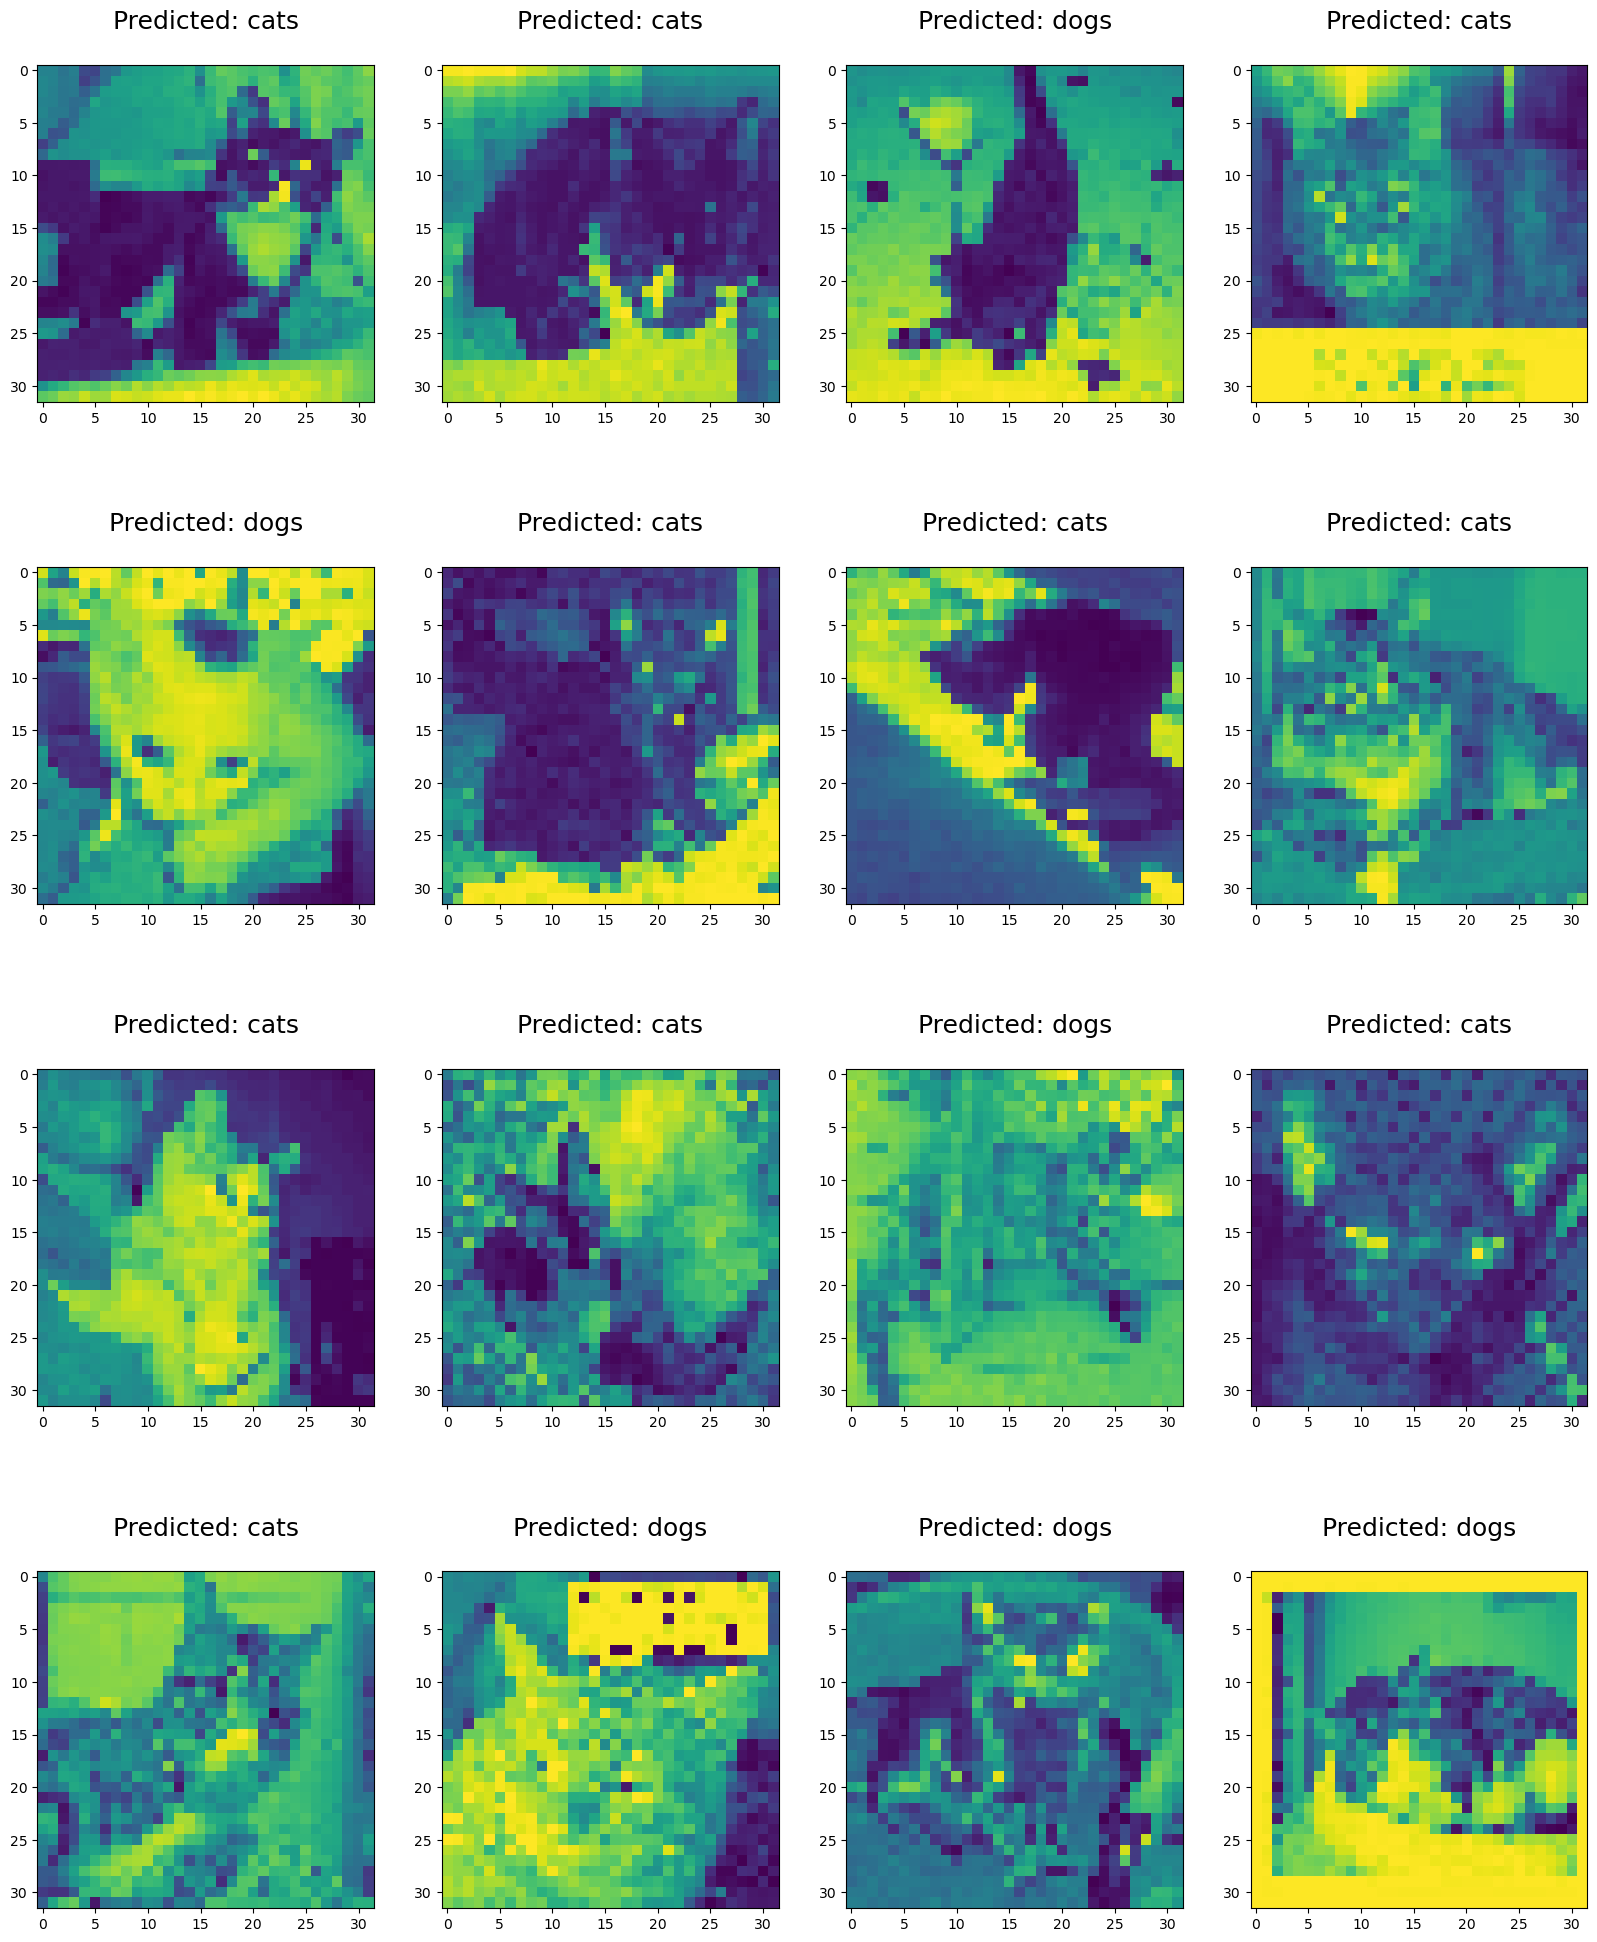

In [17]:
# get the data from pandas
testing = pickle.load(open("./data/pickle_pandas_image_catdog_testing.sav", "rb"))
images = testing.drop(["label", "filename"], axis=1).to_numpy().reshape(len(testing), IMGSIZE, IMGSIZE, 3)

predictions = model.predict(images)
print("Predicted: {0} images".format(len(predictions)))

im_test = []
# show some sample results
fig , ax = plt.subplots(4, 4, figsize=(20, 25))
for i, axis in enumerate(ax.flat):
    axis.imshow(images[i][:, :, 0])
    #print(predictions[i])
    pred_class =int( np.round(predictions[i]))
    pred_prob = float(predictions[i])*100
    axis.set_title(f'Predicted: {category[pred_class]}\n', fontsize=18)

## Tensorflow Input Pipelines

https://www.tensorflow.org/guide/data

### If we support raw images, we can request users to upload pipeline to process the image..?